In [ ]:
! pip install transformers
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 6.6 MB 69.5 MB/s 
     |████████████████████████████████| 596 kB 67.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.3 MB/s 
     |████████████████████████████████| 140 kB 49.8 MB/s 
     |████████████████████████████████| 1.1 MB 57.3 MB/s 
     |████████████████████████████████| 212 kB 51.9 MB/s 
     |████████████████████████████████| 127 kB 52.4 MB/s 
     |████████████████████████████████| 144 kB 55.2 MB/s 
     |████████████████████████████████| 271 kB 53.0 MB/s 
     |███████████

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer, TFBertModel, TFDistilBertForMultipleChoice
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFGPT2ForSequenceClassification, TFRobertaForSequenceClassification

import json

MODEL_NAME = 'distilbert-base-uncased'
MODEL_NAME = 'huggingface/CodeBERTa-small-v1'
BATCH_SIZE = 16
N_EPOCHS = 3


In [ ]:
task2_x = []
task2_y = []
task2_test_x = []
task2_test_y = []

with open("train_x.txt", 'r') as f:
  for line in f:
    task2_x.append(line)


with open("train_y.txt", 'r') as f:
  for line in f:
    task2_y.append(line)


with open("test_x.txt", 'r') as f:
  for line in f:
    task2_test_x.append(line)


with open("test_y.txt", 'r') as f:
  for line in f:
    task2_test_y.append(line)


print(len(task2_x), len(task2_y),len(task2_test_x),len(task2_test_y))

17981 17981 1998 1998


In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=15, batch_size=BATCH_SIZE)



Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/971k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/321M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
1124/1124 [==============================] - 1076s 946ms/step - loss: 0.6200 - accuracy: 0.7416
Epoch 2/15
1124/1124 [==============================] - 1066s 948ms/step - loss: 0.5690 - accuracy: 0.7598
Epoch 3/15
1124/1124 [==============================] - 1066s 948ms/step - loss: 0.5442 - accuracy: 0.7709
Epoch 4/15
1124/1124 [==============================] - 1066s 949ms/step - loss: 0.5231 - accuracy: 0.7793
Epoch 5/15
1124/1124 [==============================] - 1066s 948ms/step - loss: 0.4986 - accuracy: 0.7908
Epoch 6/15
1124/1124 [==============================] - 1066s 948ms/step - loss: 0.4675 - accuracy: 0.8032
Epoch 7/15
1124/1124 [==============================] - 1065s 948ms/step - loss: 0.4332 - accuracy: 0.8174
Epoch 8/15
1124/1124 [==============================] - 1065s 948ms/step - loss: 0.3913 - accuracy: 0.8331
Epoch 9/15
1124/1124 [==============================] - 1065s 948ms/step - loss: 0.3536 - accuracy: 0.8507
Epoch 10/15
1124/1124 [==============

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
print(test_dataset2)

In [ ]:
# 5 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=5, batch_size=BATCH_SIZE)


Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/971k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/321M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
 940/1124 [========================>.....] - ETA: 2:54 - loss: 0.6440 - accuracy: 0.7352

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 10 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=10, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
1124/1124 [==============================] - 1061s 937ms/step - loss: 0.6234 - accuracy: 0.7420
Epoch 2/10
1124/1124 [==============================] - 1054s 938ms/step - loss: 0.5689 - accuracy: 0.7570
Epoch 3/10
1124/1124 [==============================] - 1053s 937ms/step - loss: 0.5389 - accuracy: 0.7690
Epoch 4/10
1124/1124 [==============================] - 1054s 937ms/step - loss: 0.5191 - accuracy: 0.7783
Epoch 5/10
1124/1124 [==============================] - 1053s 937ms/step - loss: 0.4935 - accuracy: 0.7920
Epoch 6/10
1124/1124 [==============================] - 1053s 936ms/step - loss: 0.4646 - accuracy: 0.8033
Epoch 7/10
1124/1124 [==============================] - 1054s 938ms/step - loss: 0.4259 - accuracy: 0.8230
Epoch 8/10
1124/1124 [==============================] - 1054s 937ms/step - loss: 0.3961 - accuracy: 0.8367
Epoch 9/10
1124/1124 [==============================] - 1053s 937ms/step - loss: 0.3538 - accuracy: 0.8533
Epoch 10/10
1124/1124 [==============

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.91      0.59      0.71       416
           1       0.84      0.79      0.81      1284
           2       0.32      0.57      0.41       298

    accuracy                           0.71      1998
   macro avg       0.69      0.65      0.65      1998
weighted avg       0.78      0.71      0.73      1998



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.7137137137137137


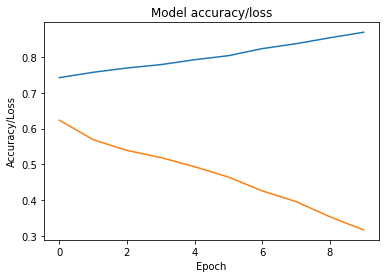

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 20 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=20, batch_size=BATCH_SIZE)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 25 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=25, batch_size=BATCH_SIZE)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()